###Juan Camilo Serrano 2021
###Libraries

In [ ]:
#Sistema
import sys 
import os
#Data Sciencie
import pandas as pd
#numerico
import numpy as np
#graficas
import matplotlib.pyplot as plt
import seaborn as sns # estilos de plt
#ML
import tensorflow as tf
import keras 
import sklearn 
from sklearn.model_selection import train_test_split

###Preprocesamiento de datos


In [ ]:
#importar dataset
dataset = pd.read_csv("/content/1 dataset_flor_iris.csv")#lee los data set SCV
dataset #

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
dataset.head()#mirar encabezado
dataset.tail()#mirar cola de datos...

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
# Reduccion manual de dimensionalidad (Eliminar columna ID)
del dataset["Id"]#delete columna ID 
#dataset 


In [ ]:
dataset.rename(columns={"Species":"Target","PetalLengthCm":"LargoSepaloCm","PetalWidthCm":"AnchoPetaloCm",},inplace=True)

In [ ]:
#editar dato
dato = dataset["SepalLengthCm"][0]
dataset["SepalLengthCm"][0] = 5.1 #ubicacion del dato a cambiar = nuevo dato
dato

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


5.1

In [ ]:
# operaciones entre elementos del dataset
suma_dos_elementos =dataset['SepalLengthCm'][3]+dataset['SepalWidthCm'][1]
suma_dos_elementos

7.6

In [ ]:
#Determinar la forma de los datos
dataset.shape#(Samples, Features)

(150, 5)

Grafica exploratoria

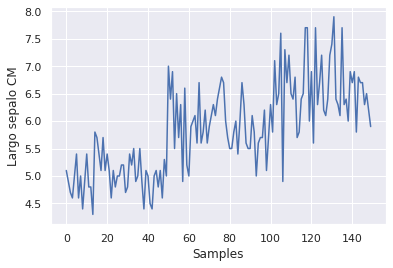

In [ ]:
serie_datos_largo_sepalo = dataset["SepalLengthCm"]
# Grafica avanzada
%matplotlib inline
plt.plot(serie_datos_largo_sepalo)
plt.ylabel('Largo sepalo CM')
plt.xlabel('Samples')
plt.show()

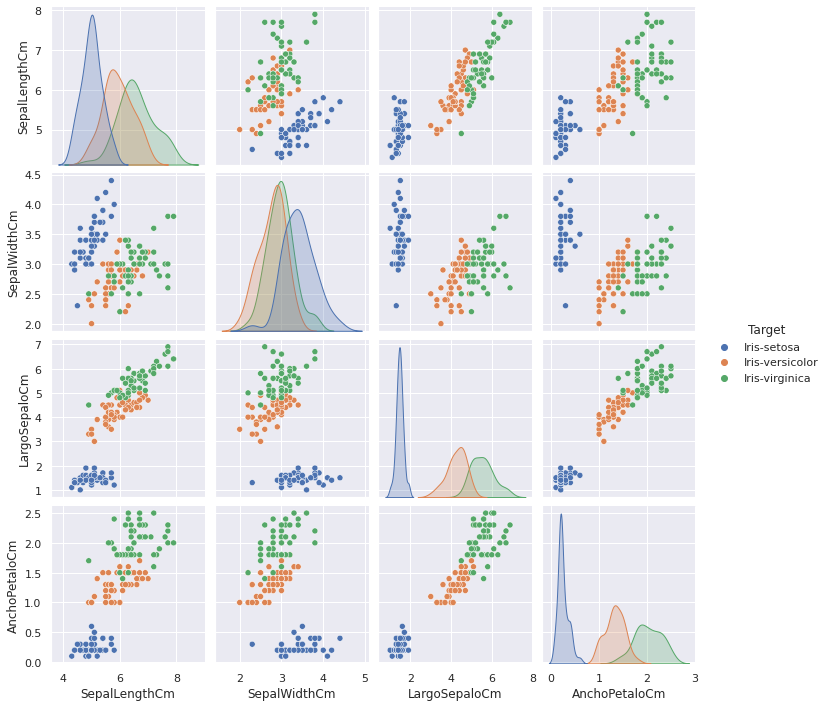

In [ ]:
# Grafica avanzada
%matplotlib inline
sns.set()#stilos sns sobre plt
#sns.pairplot(dataset)
sns.pairplot(dataset, hue="Target")

In [ ]:
#ver clase explicacion.8:07pm


###Splitting(division de los datos)


In [ ]:
#Dataset completo esta en la variable data set
dataset_train, dataset_validation = train_test_split(dataset, train_size=0.6,shuffle=True)
dataset_train
#dataset_validation.shape



,SepalLengthCm,SepalWidthCm,LargoSepaloCm,AnchoPetaloCm,Target
14,5.8,4.0,1.2,0.2,Iris-setosa
25,5.0,3.0,1.6,0.2,Iris-setosa
30,4.8,3.1,1.6,0.2,Iris-setosa
31,5.4,3.4,1.5,0.4,Iris-setosa
43,5.0,3.5,1.6,0.6,Iris-setosa
...,...,...,...,...,...
114,5.8,2.8,5.1,2.4,Iris-virginica
26,5.0,3.4,1.6,0.4,Iris-setosa
60,5.0,2.0,3.5,1.0,Iris-versicolor
28,5.2,3.4,1.4,0.2,Iris-setosa


In [ ]:
#Luego de la validacion entre train/validation/test debemos 
#separar la columna de tarjet de cada subconjunto de los datos
#dataset  X => features; dataset y => target
dataset_train_X = dataset_train.drop("Target", axis=1)#Elimina columna Target
#dataset_train_X.head()
dataset_train_y = dataset_train["Target"]#Solo dejamos columna Target
#dataset_train_y.head()
dataset_validation_X = dataset_validation.drop("Target", axis=1)
dataset_validation_y = dataset_validation["Target"]
#dataset_validation_y.shape


###Algortimo de Aprendizaje Supervisado de Clasificacion

Que se puede hacer con los datos

##Algoritmo Naive Bayes Gausiano 

In [ ]:
from sklearn.naive_bayes import GaussianNB 

model = GaussianNB()#instanciar el modelo ya importado
model.fit(dataset_train_X,dataset_train_y)#train (Features,Train), Overfiting con solo 150 datos?
inference = model.predict(dataset_validation_X )#proceso de inferencia)

In [ ]:
from sklearn.metrics import accuracy_score #metrica de exactitud
model_accuracy = accuracy_score(dataset_validation_y,inference)

In [ ]:
print("La exactitud del modelo fue",model_accuracy*100,"%")


La exactitud del modelo fue 96.66666666666667 %


In [ ]:
#nuevo dato inventado, simula que ya se esta utilizando el programa
dataset_test = dataset_validation_X
dataset_test = dataset_test[8:9]
dataset_test["SepalLengthCm"] = 4.8
dataset_test["SepalWidthCm"] = 3.8
dataset_test["LargoSepaloCm"] = 1.3
dataset_test["AnchoPetaloCm"] = 0.2
dataset_test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

,SepalLengthCm,SepalWidthCm,LargoSepaloCm,AnchoPetaloCm
13,4.8,3.8,1.3,0.2


In [ ]:
prediccion_IA = model.predict(dataset_test)
prediccion_IA

array(['Iris-setosa'], dtype='<U15')